In [2]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/')
from utility import *

# main figure 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

plt.rcParams["font.family"] = "Arial"
fig, axs = plt.subplots(6, 2, sharex=True, sharey=True, figsize=(18, 24), tight_layout=True)

covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = {'cov3':'3x', 'cov2':'2x', 'cov1':'1x', 'cov1over2':'0.5x', 'cov3over4':'0.75x', \
        'cov1over4':'0.25x', 'cov1over10':'0.1x'}
modes = ['wgs', 'ancwgsVSmod']

bl_lens = [4, 8, 12, 16, 20]
bins = np.linspace(0, 25, 126) # bins of 0.2cm

fs_l = 12
fs = 12
fs_t = 18
color_fp = "red"
ec = "silver"
cmap = "viridis_r"
alpha = 0.8
xlim = (0,26)

for row, cov in enumerate(covs):
    print(f'coverage: {cov2str[cov]}')
    for col, mode in enumerate(modes):

        df_called, powers = lengthCallAll(bl_lens, cov, f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_{mode}/calledIBD', threshold=0.8)
        assert(len(bl_lens)==len(df_called)==len(powers)) # Sanity Check
    
        ### Set Colors
        cmap = cm.get_cmap(cmap)
        colors = [cmap(x) for x in np.linspace(0,1, len(bl_lens))]
    
        ####### Do the actual Plot
        ax = axs[row, col]
        # Plot All Histograms        
        for i in range(len(bl_lens)):
            l = bl_lens[i]
            df_called_trunc = np.array(df_called[i])
            if mode == 'ancwgsVSmod':
                print(f'{np.mean(df_called[i])}, {np.std(df_called[i])}')
            df_called_trunc[df_called_trunc>=27.5] = 27.5
            ax.hist(df_called_trunc, bins = bins, color = colors[i], alpha=alpha, 
                label= str(l) + " cM", ec=ec)
            ax.axvline(l, color = "gray", linewidth=2)
            ax.text(l+0.5, 80, round(powers[i], 3), fontsize=20, fontweight='roman')
    
        
        ax.set_xlim(xlim)
        ax.set_xticks(bl_lens + [25])
        ax.set_xticklabels(bl_lens + ['>=27.5'])
        ax.tick_params(axis='both', labelsize=fs_t)
        if row == col == 0:
            legend = ax.legend(loc = 'upper left', fontsize = fs_l, title="Simulated IBD")
            legend.get_title().set_fontsize(fs_l)
    fig.text(-0.005, 11/12 - row/6, cov2str[cov], ha='center', va='center', rotation='vertical', fontsize=24)


fig.text(0.25, 1.01, 'anc (wgs) vs. anc (wgs)', ha='center', va='center', fontsize=32)
fig.text(0.75, 1.01, 'anc (wgs) vs. modern', ha='center', va='center', fontsize=32)

fig.text(0.5, -0.025, 'Inferred IBD Length(cM)', ha='center', va='center', fontsize=32)
fig.text(-0.03, 0.5, 'Inferred IBD Blocks', ha='center', va='center', rotation='vertical', fontsize=32)
plt.savefig('syntheticIBDpanel.png', dpi=300, bbox_inches="tight")
plt.savefig('syntheticIBDpanel.pdf', dpi=300, bbox_inches="tight")

# compare default ancIBD with ancIBD with custom transition matrix

coverage: 2x
4.3326937341399665, 0.46552619626157776
8.32886983727112, 0.4472463191900945
12.345514857981488, 0.4349829425721888
16.318099529476928, 0.49181822318351154
20.33416827650852, 0.44785585935930244
4.2994802762742985, 0.42788481600760314
8.290703701472568, 0.4173684913071387
12.308810194687842, 0.3965524414019014
16.287527464366338, 0.47675313037365497
20.298954214295197, 0.4314417241461551
coverage: 1x
4.361810412965344, 0.5197823799012755
8.362985494465732, 0.5315905531903484
12.365354867935563, 0.4647309054225019
16.345966446833607, 0.5153257811058248
20.36823377728615, 0.47444501928656385
4.323783513156557, 0.4742425437481896
8.319152996734145, 0.48434436103449824
12.331018405934906, 0.44380081261617493
16.317810495330047, 0.49289145044787425
20.32600782526283, 0.45967437317154053
coverage: 0.75x
4.3772530790010915, 0.5122480806546484
8.37227880931244, 0.5298260722347176
12.374910603953456, 0.48379980382933163
16.36258329983158, 0.5310791343629794
20.37468255200176, 0.498

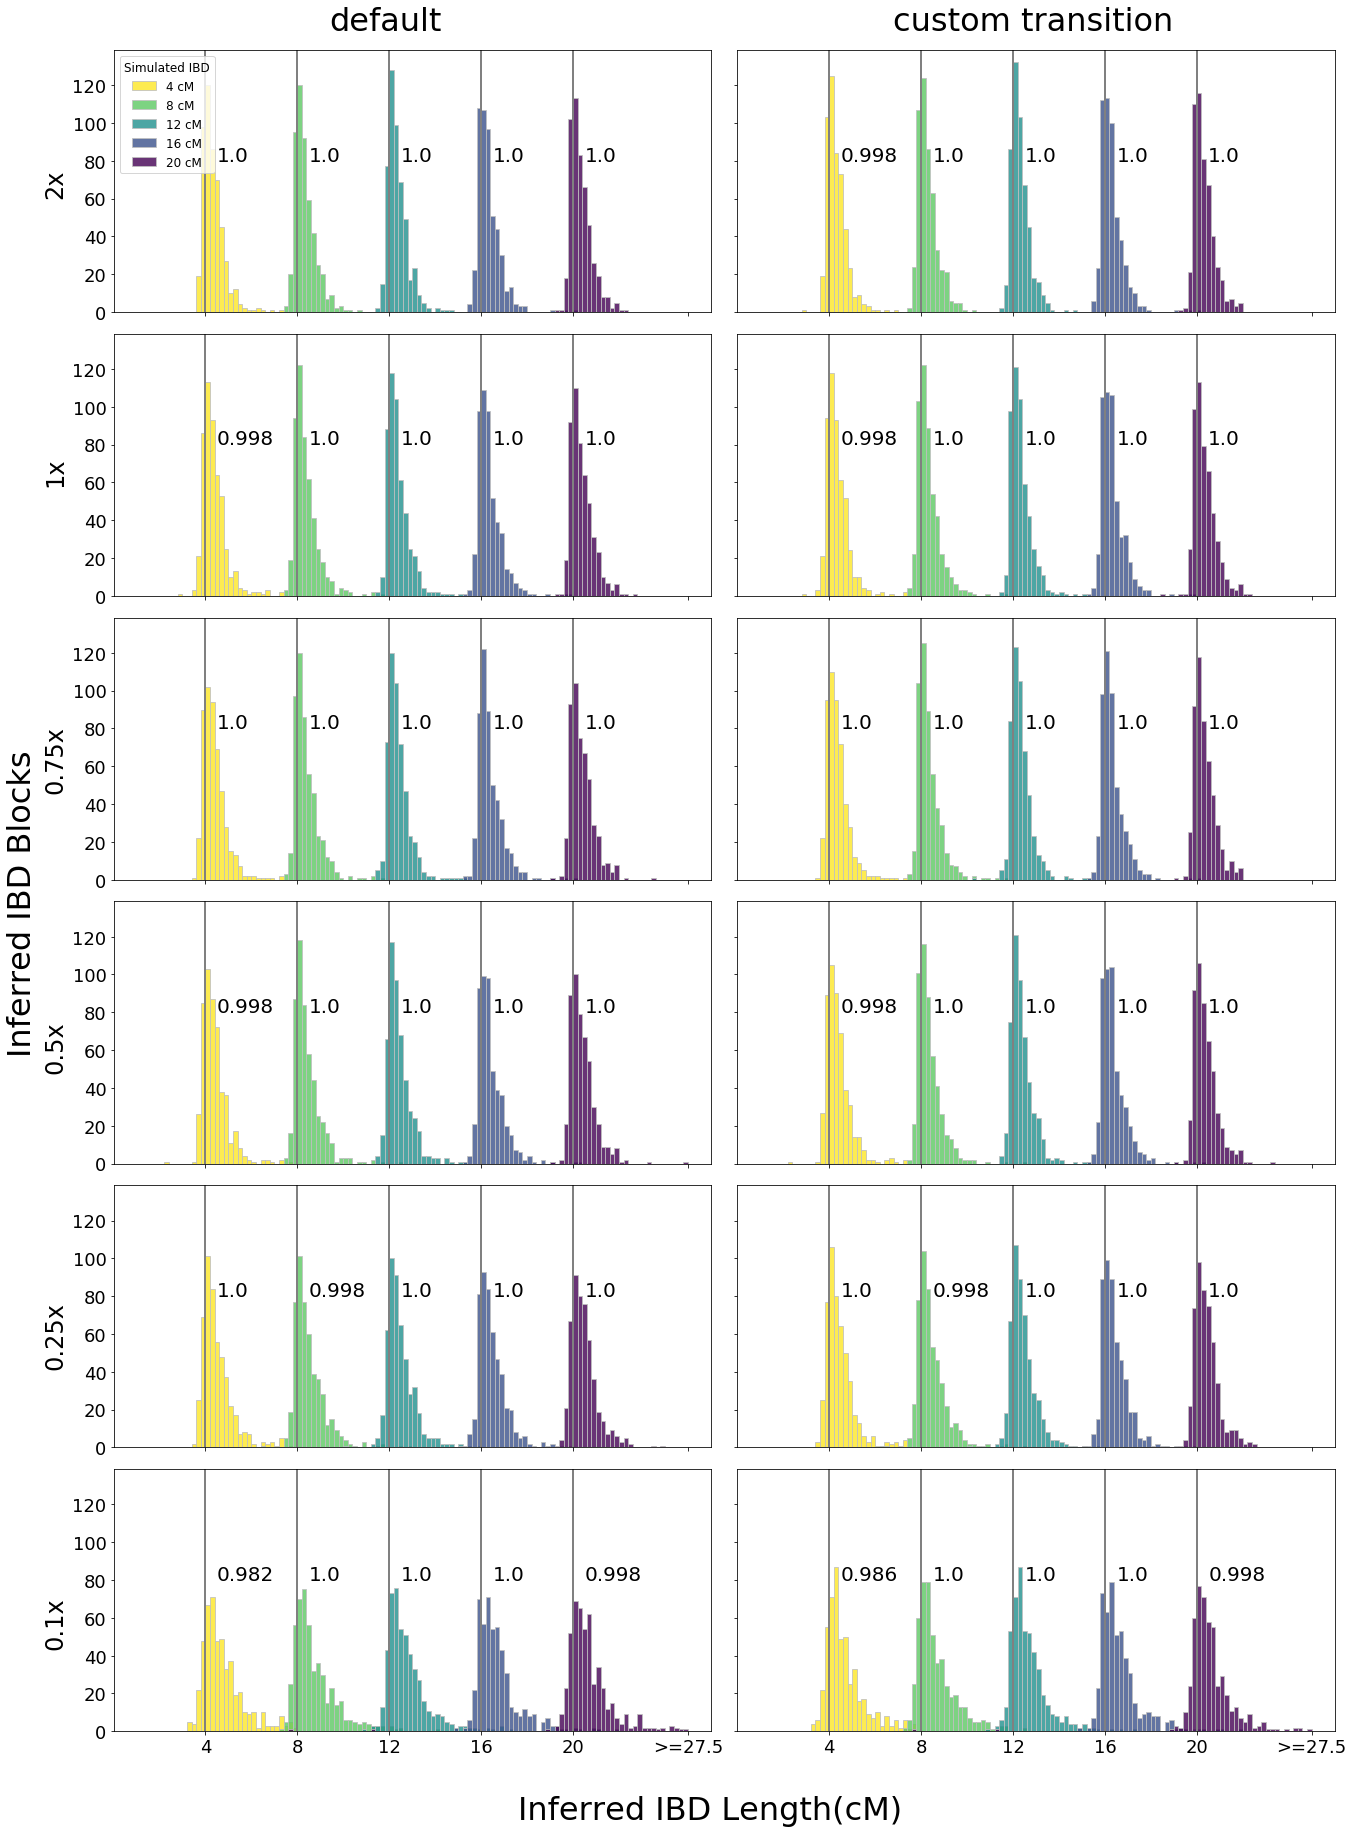

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

plt.rcParams["font.family"] = "Arial"
fig, axs = plt.subplots(6, 2, sharex=True, sharey=True, figsize=(18, 24), tight_layout=True)

covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = {'cov3':'3x', 'cov2':'2x', 'cov1':'1x', 'cov1over2':'0.5x', 'cov3over4':'0.75x', \
        'cov1over4':'0.25x', 'cov1over10':'0.1x'}
mode = 'ancwgsVSmod'
dirs = ['calledIBD', 'calledIBD_asym']

bl_lens = [4, 8, 12, 16, 20]
bins = np.linspace(0, 25, 126) # bins of 0.2cm

fs_l = 12
fs = 12
fs_t = 18
color_fp = "red"
ec = "silver"
cmap = "viridis_r"
alpha = 0.8
xlim = (0,26)

for row, cov in enumerate(covs):
    print(f'coverage: {cov2str[cov]}')
    for col, dir in enumerate(dirs):

        df_called, powers = lengthCallAll(bl_lens, cov, f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_{mode}/{dir}', threshold=0.8)
        assert(len(bl_lens)==len(df_called)==len(powers)) # Sanity Check
    
        ### Set Colors
        cmap = cm.get_cmap(cmap)
        colors = [cmap(x) for x in np.linspace(0,1, len(bl_lens))]
    
        ####### Do the actual Plot
        ax = axs[row, col]
        # Plot All Histograms        
        for i in range(len(bl_lens)):
            l = bl_lens[i]
            df_called_trunc = np.array(df_called[i])
            if mode == 'ancwgsVSmod':
                print(f'{np.mean(df_called[i])}, {np.std(df_called[i])}')
            df_called_trunc[df_called_trunc>=27.5] = 27.5
            ax.hist(df_called_trunc, bins = bins, color = colors[i], alpha=alpha, 
                label= str(l) + " cM", ec=ec)
            ax.axvline(l, color = "gray", linewidth=2)
            ax.text(l+0.5, 80, round(powers[i], 3), fontsize=20, fontweight='roman')
    
        
        ax.set_xlim(xlim)
        ax.set_xticks(bl_lens + [25])
        ax.set_xticklabels(bl_lens + ['>=27.5'])
        ax.tick_params(axis='both', labelsize=fs_t)
        if row == col == 0:
            legend = ax.legend(loc = 'upper left', fontsize = fs_l, title="Simulated IBD")
            legend.get_title().set_fontsize(fs_l)
    fig.text(-0.005, 11/12 - row/6, cov2str[cov], ha='center', va='center', rotation='vertical', fontsize=24)


fig.text(0.25, 1.01, 'default', ha='center', va='center', fontsize=32)
fig.text(0.75, 1.01, 'custom transition', ha='center', va='center', fontsize=32)

fig.text(0.5, -0.025, 'Inferred IBD Length(cM)', ha='center', va='center', fontsize=32)
fig.text(-0.03, 0.5, 'Inferred IBD Blocks', ha='center', va='center', rotation='vertical', fontsize=32)
plt.savefig('syntheticIBDpanel_transitionMatComparison.png', dpi=300, bbox_inches="tight")
plt.savefig('syntheticIBDpanel_transitionMatComparison.pdf', dpi=300, bbox_inches="tight")